In [65]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('./time-series-19-covid-combined.csv')

In [67]:
population = {'Denmark': 5831404, 'Finland': 5529543, 'Norway': 5379475, 'Sweden': 10353442}

In [68]:
data.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [69]:
filtered_data = data[data['Country/Region'].isin(['Denmark', 'Finland', 'Sweden', 'Norway'])]

In [70]:
filtered_data['Country/Region'].unique()

array(['Denmark', 'Finland', 'Norway', 'Sweden'], dtype=object)

In [71]:
len(data), len(filtered_data)

(231744, 4896)

In [72]:
filtered_data = filtered_data[filtered_data.Date <= "2020-04-30"]
filtered_data = filtered_data[filtered_data.Date >= "2020-01-31"]

In [73]:
len(filtered_data)

546

In [74]:
filtered_data.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
84057,2020-01-31,Denmark,Faroe Islands,0,0.0,0
84058,2020-02-01,Denmark,Faroe Islands,0,0.0,0
84059,2020-02-02,Denmark,Faroe Islands,0,0.0,0
84060,2020-02-03,Denmark,Faroe Islands,0,0.0,0
84061,2020-02-04,Denmark,Faroe Islands,0,0.0,0


In [75]:
data_agg = filtered_data.groupby(['Country/Region', 'Date'])['Deaths'].sum().reset_index()

In [76]:
data_agg.head()

,Country/Region,Date,Deaths
0,Denmark,2020-01-31,0
1,Denmark,2020-02-01,0
2,Denmark,2020-02-02,0
3,Denmark,2020-02-03,0
4,Denmark,2020-02-04,0


In [77]:
data_agg['Population'] = data_agg['Country/Region'].map(population)

In [78]:
data_agg.head()

,Country/Region,Date,Deaths,Population
0,Denmark,2020-01-31,0,5831404
1,Denmark,2020-02-01,0,5831404
2,Denmark,2020-02-02,0,5831404
3,Denmark,2020-02-03,0,5831404
4,Denmark,2020-02-04,0,5831404


In [79]:
data_agg['Date'] = data_agg['Date'].astype('datetime64[s]')

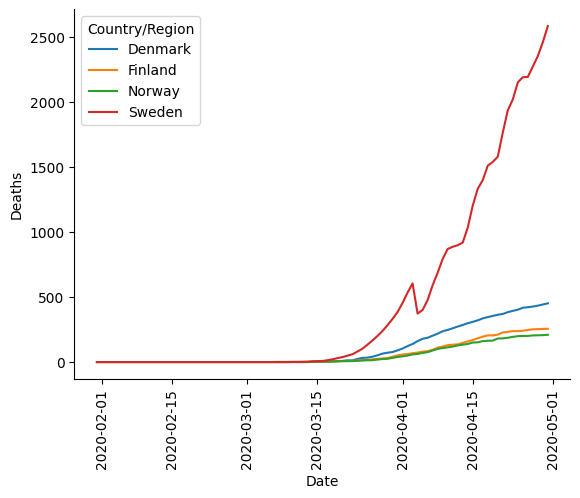

In [80]:
ax = sns.lineplot(data = data_agg, x = 'Date', y = 'Deaths', hue = 'Country/Region')
plt.xticks(rotation = 90);
sns.despine()

In [81]:
data_agg.head()

,Country/Region,Date,Deaths,Population
0,Denmark,2020-01-31,0,5831404
1,Denmark,2020-02-01,0,5831404
2,Denmark,2020-02-02,0,5831404
3,Denmark,2020-02-03,0,5831404
4,Denmark,2020-02-04,0,5831404


In [82]:
data_agg['prev_deaths'] = data_agg.shift(1)['Deaths']

In [83]:
data_agg['diff'] = data_agg['Deaths'] - data_agg['prev_deaths']

In [84]:
data_agg = data_agg[data_agg['Date'] >= '2020-03-01']

In [85]:
data_agg.head()

,Country/Region,Date,Deaths,Population,prev_deaths,diff
30,Denmark,2020-03-01,0,5831404,0.0,0.0
31,Denmark,2020-03-02,0,5831404,0.0,0.0
32,Denmark,2020-03-03,0,5831404,0.0,0.0
33,Denmark,2020-03-04,0,5831404,0.0,0.0
34,Denmark,2020-03-05,0,5831404,0.0,0.0


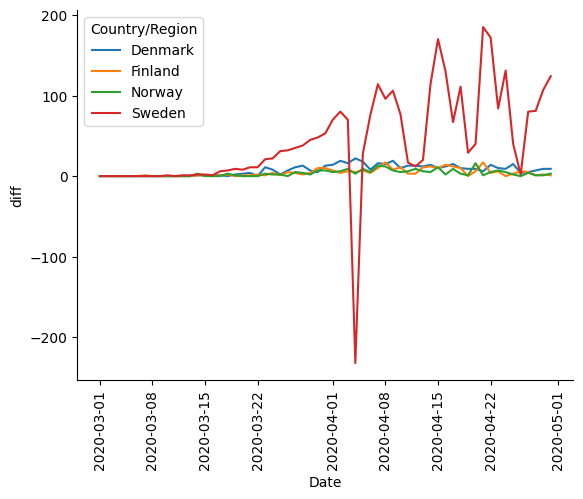

In [86]:
ax = sns.lineplot(data = data_agg, x = 'Date', y = 'diff', hue = 'Country/Region')
plt.xticks(rotation = 90);
sns.despine()

In [87]:
data_agg['diff_norm'] = data_agg['diff'] / data_agg['Population'] * 1000000

In [88]:
data_agg.head()

,Country/Region,Date,Deaths,Population,prev_deaths,diff,diff_norm
30,Denmark,2020-03-01,0,5831404,0.0,0.0,0.0
31,Denmark,2020-03-02,0,5831404,0.0,0.0,0.0
32,Denmark,2020-03-03,0,5831404,0.0,0.0,0.0
33,Denmark,2020-03-04,0,5831404,0.0,0.0,0.0
34,Denmark,2020-03-05,0,5831404,0.0,0.0,0.0


In [89]:
data_agg['after_apr'] = data_agg['Date'] >= '2020-04-01' # Sweden implements a policy change this day

Is there a change in the average normalized difference in deaths in Sweden between a policy change in 2020-04-01 and before that?

In [90]:
data_agg.head()

,Country/Region,Date,Deaths,Population,prev_deaths,diff,diff_norm,before_apr
30,Denmark,2020-03-01,0,5831404,0.0,0.0,0.0,True
31,Denmark,2020-03-02,0,5831404,0.0,0.0,0.0,True
32,Denmark,2020-03-03,0,5831404,0.0,0.0,0.0,True
33,Denmark,2020-03-04,0,5831404,0.0,0.0,0.0,True
34,Denmark,2020-03-05,0,5831404,0.0,0.0,0.0,True


In [91]:
data_mod = data_agg[data_agg['Country/Region'] == 'Sweden']
X = data_mod['after_apr'].astype(int)
y = data_mod['diff_norm']

In [92]:
X = sm.add_constant(X)

In [93]:
model = sm.OLS(y, X)

In [94]:
result = model.fit()

In [95]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diff_norm   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     18.08
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           7.67e-05
Time:                        09:11:00   Log-Likelihood:                -186.70
No. Observations:                  61   AIC:                             377.4
Df Residuals:                      59   BIC:                             381.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0974      0.975      7.278      0.000       5.146       9.049
before_apr    -5.7241      1.346     -4.252      0.000      -8.418      -3.030
==============================================================================
Omnibus:                       64.665   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              677.018
Skew:                          -2.723   Prob(JB):                    9.72e-148
Kurtosis:                      18.385   Cond. No.                         2.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = average normalized difference in death rate in Sweden

X = **indicator** of data being during and after April

b0 = Average normalized difference in deaths in Sweden before April

b1 = Average normalized differences in deaths in Sweden during and after April
